In [1]:
#function to test models 
import nest_asyncio
import warnings
from mb_utils.src.logging import logger

nest_asyncio.apply()
warnings.filterwarnings("ignore")

In [2]:
from mb_pytorch.utils.version import version
version

'1.2.20'

In [3]:
from mb_pytorch.dataloader.loader import DataLoader

k = DataLoader('../scripts/detection/object_detection.yaml',logger=logger)
k_data = k.data_dict['data']
model_data_dict = k.data_dict['model']

Wed 13:18:57,281 INF Read data from yaml file: [{'data': {'file': {'root': '/home/malav/Desktop/mb_packages/mb_pytorch/data/fruit_dat


In [4]:
from mb_pytorch.training.train_params import train_helper
model_yaml_data = k.data_dict['model']
loss_attr,optimizer_attr,optimizer_dict,scheduler_attr,scheduler_dict = train_helper(model_yaml_data) 

In [5]:
from torch.utils.tensorboard import SummaryWriter
import os

path_logs = os.path.join(os.path.split(k_data['file']['root'])[0], 'logs')
writer = SummaryWriter(log_dir=path_logs)


In [6]:
train_loader,val_loader,train_dataset,test_dataset = k.data_load()


50row [00:00, 17685.55row/s]
Wed 13:18:57,341 INF Loaded dataframe from /home/malav/Desktop/mb_packages/mb_pytorch/data/fruit_dataset/fruit_dataset_final_test.csv
Wed 13:18:57,343 INF Data file: {'root': '/home/malav/Desktop/mb_packages/mb_pytorch/data/fruit_dataset/fruit_dataset_final_test.csv'
Wed 13:18:57,345 INF Data columns: Index(['image_id', 'image_path', 'bbox', 'label', 'image_type'], dtype='object')                  
Wed 13:18:57,346 INF Data will be split into train and validation according to train_file input : True                               
Wed 13:18:57,347 INF If unnamed columns are present, they will be removed.                                                           
Wed 13:18:57,349 INF If duplicate rows are present, they will be removed.                                                            
Wed 13:18:57,351 INF Length of data after removing invalid paths: 50                                                                 
Wed 13:18:57,353 INF Skipping ima

In [7]:
train_dataset.__getitem__(0)

(tensor([[[1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
          [1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
          [1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
          ...,
          [1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
          [1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
          [1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000]],
 
         [[1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
          [1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
          [1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
          ...,
          [1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
          [1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
          [1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000]],
 
         [[1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
          [1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
          [1.0000, 1.0000, 1.0000,  ...,

In [8]:
test_dataset.__getitem__(4)

(tensor([[[0.0000, 0.0031, 0.0130,  ..., 0.0000, 0.0000, 0.0000],
          [0.0093, 0.0101, 0.0128,  ..., 0.0000, 0.0000, 0.0000],
          [0.0246, 0.0217, 0.0123,  ..., 0.0000, 0.0000, 0.0000],
          ...,
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000]],
 
         [[0.0000, 0.0031, 0.0130,  ..., 0.0000, 0.0000, 0.0000],
          [0.0093, 0.0101, 0.0128,  ..., 0.0000, 0.0000, 0.0000],
          [0.0246, 0.0217, 0.0123,  ..., 0.0000, 0.0000, 0.0000],
          ...,
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000]],
 
         [[0.0000, 0.0031, 0.0130,  ..., 0.0000, 0.0000, 0.0000],
          [0.0093, 0.0101, 0.0128,  ..., 0.0000, 0.0000, 0.0000],
          [0.0246, 0.0217, 0.0123,  ...,

In [9]:
# for id,data in enumerate(train_loader):
#     print(id)
#     image,bbox,labels = data.values()
#     print(image.shape)
#     print(bbox)
#     print(labels)
#     break

In [10]:
from mb_pytorch.models.modelloader import ModelLoader
model_data_load = ModelLoader(k.data_dict['model'])
model =  model_data_load.get_model()

Wed 13:18:57,907 INF Model fasterrcnn_resnet50_fpn loaded from torchvision.models.                                                   


In [11]:
from mb_pytorch.detection.training import detection_train_loop


In [12]:
detection_train_loop(k,model_data_dict,writer=writer,logger=logger)

Wed 13:18:57,917 INF Training loop Starting                                                                                          
Wed 13:18:58,359 INF Model fasterrcnn_resnet50_fpn loaded from torchvision.models.                                                   
Wed 13:18:58,361 INF Model Loaded                                                                                                    
50row [00:00, 48601.44row/s]
Wed 13:18:58,364 INF Loaded dataframe from /home/malav/Desktop/mb_packages/mb_pytorch/data/fruit_dataset/fruit_dataset_final_test.csv
Wed 13:18:58,366 INF Data file: {'root': '/home/malav/Desktop/mb_packages/mb_pytorch/data/fruit_dataset/fruit_dataset_final_test.csv'
Wed 13:18:58,368 INF Data columns: Index(['image_id', 'image_path', 'bbox', 'label', 'image_type'], dtype='object')                  
Wed 13:18:58,369 INF Data will be split into train and validation according to train_file input : True                               
Wed 13:18:58,370 INF If unnamed c

RuntimeError: The size of tensor a (4) must match the size of tensor b (45) at non-singleton dimension 1

In [ ]:
# device = 'cpu'
# for batch_idx, data in enumerate(train_loader):
#         images,bbox,labels = data.values()
#         images_l = list(image.to(device) for image in images)
#         bbox_l = list(b.to(device) for b in bbox)
#         labels_l = list(label.to(device) for label in labels)  
#         targets_l = [{'boxes': b,'labels': label} for b,label in zip(bbox, labels)]      
#         break

In [27]:
import torch    
import tqdm
import numpy as np
from mb_pytorch.utils.viewer import gradcam_viewer,create_img_grid,plot_classes_pred

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device = 'cpu'

model.to(device)
best_val_loss = float('inf')

for epoch in tqdm.tqdm(range(model_yaml_data['model_epochs']), desc="Epochs"):
        
        boxes = []
        scores = []
        labels = []
        targets_boxes = []
        targets_labels = []
        
        model.train(True)
        train_loss = 0
        
        if logger:
            logger.info('Training Started')
        for batch_idx, data in enumerate(tqdm.tqdm(train_loader, desc="Training", leave=False)):
            images,bbox,labels = data.values()
            images = list(image.to(device) for image in images)
            bbox = list(b.to(device) for b in bbox)
            bbox = [b.view(-1, 4) if b.dim() == 1 else b for b in bbox]
            labels = list(label.to(device) for label in labels)  
            targets = [{'boxes': b,'labels': label} for b,label in zip(bbox, labels)]      
                    
            #optimizer.zero_grad()
            loss_dict = model(images, targets)
            losses = sum(loss for loss in loss_dict.values())
            
            losses.backward()
            # optimizer.step()
            # if scheduler is not None:
            #     scheduler.step()
            
            train_loss += losses.item()
            if logger:
                logger.info(f'Epoch {epoch+1} - Batch {batch_idx+1} - Train Loss: {losses.item()}')
        
        avg_train_loss = train_loss / len(train_loader)
        if logger:
            logger.info(f'Epoch {epoch+1} - Train Loss: {avg_train_loss}')
            #logger.info(f"lr = {optimizer.param_groups[0]['lr']}")

        model.train(False)

        ## Validation loop
        val_loss = 0
        
        with torch.no_grad():
            for batch_idx, data_val in enumerate(tqdm.tqdm(val_loader, desc="Validation", leave=False)):
                images_val,bbox_val,labels_val = data_val.values()
                images_val = list(image.to(device) for image in images_val)
                bbox_val = list(b.to(device) for b in bbox_val)
                bbox_val = [b.view(-1, 4) if b.dim() == 1 else b for b in bbox_val]
                labels_val = list(label.to(device) for label in labels_val)  
                targets_val = [{'boxes': b,'labels': label} for b,label in zip(bbox_val, labels_val)]    


                loss_dict_val = model(images_val, targets_val)
                # if isinstance(loss_dict_val, tuple) or isinstance(loss_dict_val, list):
                #     loss_dict_val = loss_dict_val[0] 
                
                if len(loss_dict_val) == 0:
                    continue
                else:
                    for i in range(len(loss_dict_val)):
                        for j in range(len(loss_dict_val[i]['boxes'])):
                            if loss_dict_val[i]['scores'][j] > 0.8:
                                boxes.append(loss_dict_val[i]['boxes'][j])
                                scores.append(loss_dict_val[i]['scores'][j])
                                labels.append(loss_dict_val[i]['labels'][j])
                                targets_boxes.append(targets_val[i]['boxes'][j])
                                targets_labels.append(targets_val[i]['labels'][j])
                    

                val_loss += losses_val.item() * len(images_val)
                if logger: 
                    logger.info(f'Epoch {epoch+1} - Batch {batch_idx+1} - Val Loss: {losses_val.item()}')
            
            avg_val_loss = val_loss / len(val_loader.dataset)
            
            if logger:
                logger.info(f'Epoch {epoch+1} - Avg Val Loss: {avg_val_loss:.3f}')

        # TensorBoard logging
        if writer is not None:
            writer.add_scalar('Loss/train', avg_train_loss, global_step=epoch)
            writer.add_scalar('Loss/val', avg_val_loss, global_step=epoch)
            #writer.add_scalar('Learning_rate', optimizer.param_groups[0]['lr'], global_step=epoch)
            
            for name, param in model.named_parameters():
                writer.add_histogram(name, param, global_step=epoch)
            
            # Visualizations
            if len(images) > 0:
                x = images[0].to('cpu')
                create_img_grid(x, x, writer, global_step=epoch)

                # Grad-CAM visualization
                if gradcam is not None:
                    use_cuda = device != 'cpu'
                    for cam_layers in gradcam:
                        grad_img = gradcam_viewer(cam_layers, model, x.unsqueeze(0), gradcam_rgb=gradcam_rgb, use_cuda=use_cuda)
                        if grad_img is not None:
                            grad_img = np.transpose(grad_img, (2, 0, 1))
                            writer.add_image(f'Gradcam/{cam_layers}', grad_img, global_step=epoch)
                        elif logger:
                            logger.info(f'Gradcam not supported for {cam_layers}')   
   
        # Save best model
        if avg_val_loss < best_val_loss:
            best_val_loss = avg_val_loss
            best_model = model.state_dict()

            path = os.path.join(k_data['work_dir'], 'best_model.pth')
            torch.save(best_model, path)
            if logger:
                logger.info(f'Epoch {epoch + 1} - Best Model Saved (Val Loss: {best_val_loss:.4f})')

Epochs:   0%|          | 0/3 [00:00<?, ?it/s]Wed 23:05:56,380 INF Training Started                                                                                                

Training:   0%|          | 0/13 [00:00<?, ?it/s]Wed 23:06:09,085 INF Epoch 1 - Batch 1 - Train Loss: 0.2934379577636719                                                              

Training:   8%|▊         | 1/13 [00:12<02:32, 12.70s/it]Wed 23:06:20,499 INF Epoch 1 - Batch 2 - Train Loss: 0.15579234063625336                                                             

Training:  15%|█▌        | 2/13 [00:24<02:11, 11.94s/it]Wed 23:06:32,396 INF Epoch 1 - Batch 3 - Train Loss: 0.39034414291381836                                                             

Training:  23%|██▎       | 3/13 [00:36<01:59, 11.92s/it]Wed 23:06:43,872 INF Epoch 1 - Batch 4 - Train Loss: 0.16852454841136932                                                             

Training:  31%|███       | 4/13 [00:47<01:45, 11.75s/it]Wed 23:0

AttributeError: 'list' object has no attribute 'values'

In [90]:
loss_dict

{'loss_classifier': tensor(0.3891, grad_fn=<NllLossBackward0>),
 'loss_box_reg': tensor(0.1070, grad_fn=<DivBackward0>),
 'loss_objectness': tensor(0.0135, grad_fn=<BinaryCrossEntropyWithLogitsBackward0>),
 'loss_rpn_box_reg': tensor(0.0076, grad_fn=<DivBackward0>)}

In [31]:
loss_dict_val

{'boxes': tensor([[2.3580e+01, 6.5475e+01, 4.0274e+02, 5.4601e+02],
         [4.1715e+02, 9.2694e+01, 7.7249e+02, 5.5157e+02],
         [4.2025e+02, 6.8136e+01, 7.7045e+02, 5.4731e+02],
         [4.0499e+01, 5.7857e+01, 4.1589e+02, 5.4874e+02],
         [3.7118e+01, 7.1892e+01, 4.2308e+02, 5.4573e+02],
         [4.3105e+02, 1.0557e+02, 7.7612e+02, 5.4125e+02],
         [3.6112e+01, 5.7241e+01, 4.0268e+02, 5.4932e+02],
         [0.0000e+00, 4.4827e-01, 8.0000e+02, 6.0000e+02],
         [2.7470e+01, 6.6938e+01, 4.3741e+02, 5.6264e+02],
         [4.3424e+02, 1.0309e+02, 7.6152e+02, 5.3539e+02],
         [4.2011e+02, 8.9311e+01, 7.5974e+02, 5.4794e+02],
         [5.6899e+01, 7.6537e+01, 7.1487e+02, 5.6949e+02]]),
 'labels': tensor([86, 34, 86, 37, 55, 37, 53, 67, 34, 55, 51, 51]),
 'scores': tensor([0.8650, 0.6847, 0.6617, 0.5615, 0.1517, 0.1318, 0.1262, 0.1154, 0.1093,
         0.0821, 0.0696, 0.0554])}

In [51]:
loss_dict_val['boxes']

tensor([[2.3580e+01, 6.5475e+01, 4.0274e+02, 5.4601e+02],
        [4.1715e+02, 9.2694e+01, 7.7249e+02, 5.5157e+02],
        [4.2025e+02, 6.8136e+01, 7.7045e+02, 5.4731e+02],
        [4.0499e+01, 5.7857e+01, 4.1589e+02, 5.4874e+02],
        [3.7118e+01, 7.1892e+01, 4.2308e+02, 5.4573e+02],
        [4.3105e+02, 1.0557e+02, 7.7612e+02, 5.4125e+02],
        [3.6112e+01, 5.7241e+01, 4.0268e+02, 5.4932e+02],
        [0.0000e+00, 4.4827e-01, 8.0000e+02, 6.0000e+02],
        [2.7470e+01, 6.6938e+01, 4.3741e+02, 5.6264e+02],
        [4.3424e+02, 1.0309e+02, 7.6152e+02, 5.3539e+02],
        [4.2011e+02, 8.9311e+01, 7.5974e+02, 5.4794e+02],
        [5.6899e+01, 7.6537e+01, 7.1487e+02, 5.6949e+02]])

In [79]:
loss_dict_val

{'boxes': tensor([[2.3580e+01, 6.5475e+01, 4.0274e+02, 5.4601e+02],
         [4.1715e+02, 9.2694e+01, 7.7249e+02, 5.5157e+02],
         [4.2025e+02, 6.8136e+01, 7.7045e+02, 5.4731e+02],
         [4.0499e+01, 5.7857e+01, 4.1589e+02, 5.4874e+02],
         [3.7118e+01, 7.1892e+01, 4.2308e+02, 5.4573e+02],
         [4.3105e+02, 1.0557e+02, 7.7612e+02, 5.4125e+02],
         [3.6112e+01, 5.7241e+01, 4.0268e+02, 5.4932e+02],
         [0.0000e+00, 4.4827e-01, 8.0000e+02, 6.0000e+02],
         [2.7470e+01, 6.6938e+01, 4.3741e+02, 5.6264e+02],
         [4.3424e+02, 1.0309e+02, 7.6152e+02, 5.3539e+02],
         [4.2011e+02, 8.9311e+01, 7.5974e+02, 5.4794e+02],
         [5.6899e+01, 7.6537e+01, 7.1487e+02, 5.6949e+02]]),
 'labels': tensor([86, 34, 86, 37, 55, 37, 53, 67, 34, 55, 51, 51]),
 'scores': tensor([0.8650, 0.6847, 0.6617, 0.5615, 0.1517, 0.1318, 0.1262, 0.1154, 0.1093,
         0.0821, 0.0696, 0.0554])}

In [52]:
import cv2

In [56]:
x1,y1,x2,y2 = loss_dict_val['boxes'][0][0],loss_dict_val['boxes'][0][1],loss_dict_val['boxes'][0][2],loss_dict_val['boxes'][0][3]

In [73]:
x1,y1,x2,y2 = loss_dict_val['boxes'][2][0],loss_dict_val['boxes'][2][1],loss_dict_val['boxes'][2][2],loss_dict_val['boxes'][2][3]

In [59]:
images_val[0].shape

torch.Size([3, 600, 800])

In [63]:
from matplotlib import pyplot as plt

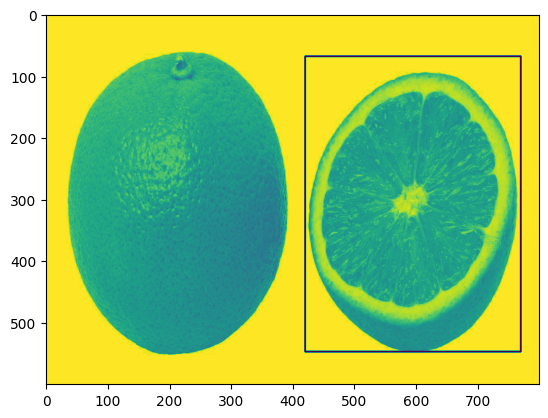

In [74]:
plt.imshow(cv2.rectangle(np.array(images_val[0][1,:,:]), (int(x1), int(y1)), (int(x2), int(y2)), (0, 0, 255), 2))


In [76]:
targets_val[0]

{'boxes': tensor([[ 17,  66, 402, 556]], dtype=torch.int32),
 'labels': tensor([1])}

In [83]:
kx = model(images_val,targets_val)

In [89]:
kx[0]['scores'][2]

tensor(0.6617, grad_fn=<SelectBackward0>)

In [ ]:
fig, a = plt.subplots(1,1)
fig.set_size_inches(5,5)
a.imshow(img)
for box in (target['boxes']):
    x, y, width, height  = box[0], box[1], box[2]-box[0], box[3]-box[1]
    rect = patches.Rectangle((x, y),
                                 width, height,
                                 linewidth = 2,
                                 edgecolor = 'r',
                                 facecolor = 'none')

    # Draw the bounding box on top of the image
    a.add_patch(rect)
plt.show()

In [43]:
loss_dict

{'loss_classifier': tensor(0.3891, grad_fn=<NllLossBackward0>),
 'loss_box_reg': tensor(0.1070, grad_fn=<DivBackward0>),
 'loss_objectness': tensor(0.0135, grad_fn=<BinaryCrossEntropyWithLogitsBackward0>),
 'loss_rpn_box_reg': tensor(0.0076, grad_fn=<DivBackward0>)}